# NAIVE BAYES

### IMPORTING HEADER FILES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### VISUALIZING THE DATA

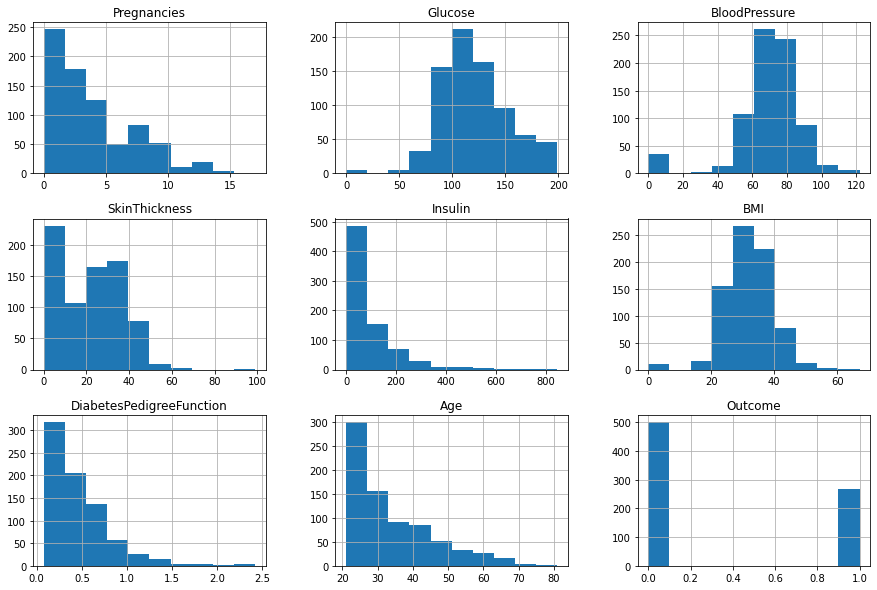

In [2]:
df.hist(figsize=(15,10))
plt.show()

### CHECKING THE TARGET DATA

<AxesSubplot:>

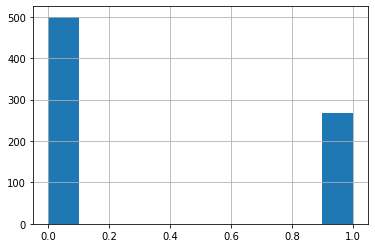

In [3]:
df["Outcome"].hist()

### CHECKING CORRELATION OF DATA

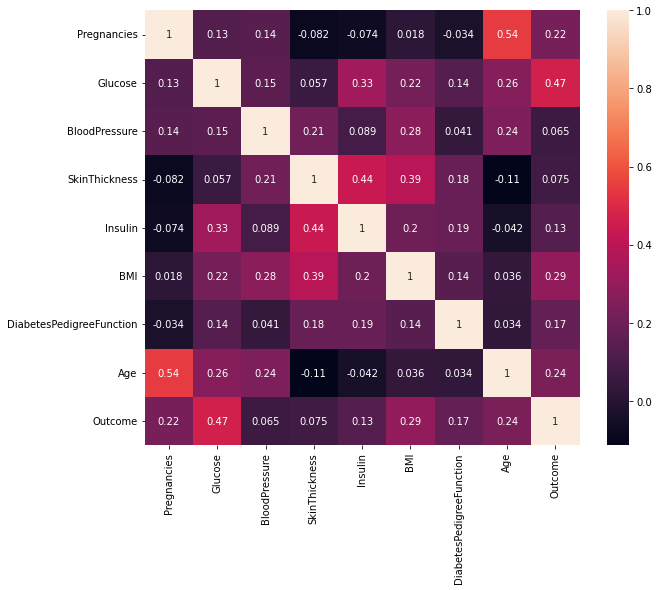

In [4]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sn.heatmap(correlation, annot=True, square=True)
plt.show()

### Plotting the gaussian curves to check which feature one resembles the most  

<AxesSubplot:xlabel='BMI', ylabel='Count'>

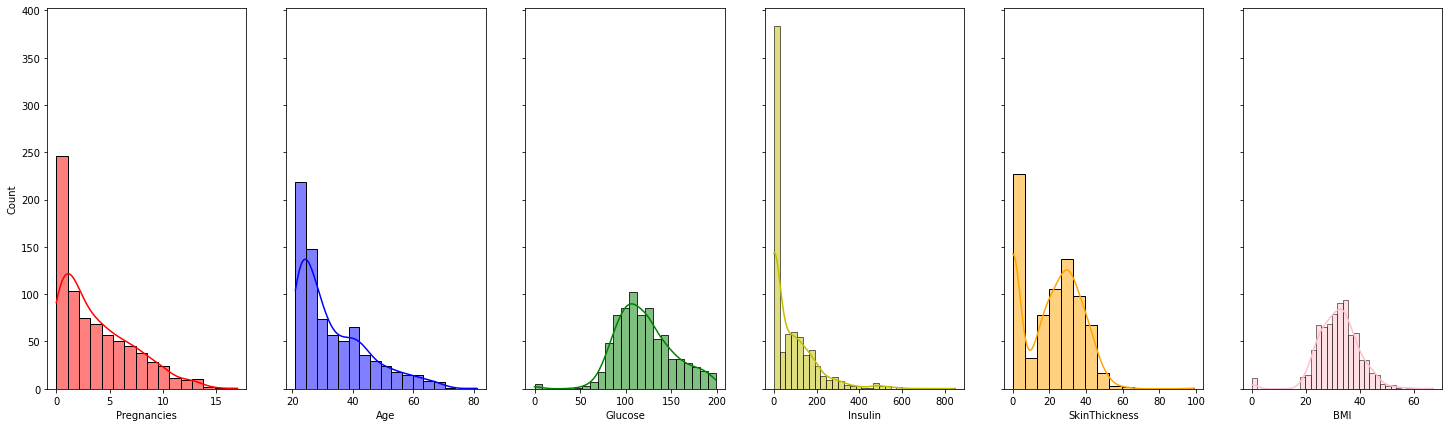

In [5]:
fig, axes = plt.subplots(1, 6, figsize=(25, 7), sharey=True)
sn.histplot(df, ax=axes[0], x="Pregnancies", kde=True, color='r')
sn.histplot(df, ax=axes[1], x="Age", kde=True, color='b')

sn.histplot(df, ax=axes[2], x="Glucose", kde=True, color='g')
sn.histplot(df, ax=axes[3], x="Insulin", kde=True, color='y')


sn.histplot(df, ax=axes[4], x="SkinThickness", kde=True, color='orange')
sn.histplot(df, ax=axes[5], x="BMI", kde=True, color='pink')

### EXTRACTING THE FEATURES WITH PROPER GAUSSIAN CURVES

In [6]:
df = df[["Glucose","BMI","Outcome"]]
df

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1
...,...,...,...
763,101,32.9,0
764,122,36.8,0
765,121,26.2,0
766,126,30.1,1


### Splitting training and testing

In [7]:
train = df.iloc[:500,:]
test = df.iloc[500:,:]

In [8]:
x_test = test[['Glucose','BMI']]
y_test = test[['Outcome']]

In [9]:
y_test.shape

(268, 1)

### CALCULATING PRIOR PROBABILITIES for "P(Y=0) and P(Y=1)"

In [10]:
def calculate_prior_prob(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

### CALCULATING POSTERIOR = LIKELIHOOD = P(X=x1|Y=y)P(X=x2|Y=y).....P(X=xn|Y=y) 
### USING GAUSSIAN 

In [11]:
def calculate_likelihood(train_df, feature_name, feature_val, Y, label):
    
    train_df = train_df[train_df[Y]==label]
    
    mean, std = train_df[feature_name].mean(), train_df[feature_name].std()
    
    #gaussian formula
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feature_val-mean)**2 / (2 * std**2 )))
    
    return p_x_given_y

### CALCULATING POSTERIOR = LIKELIHOOD * PRIOR:- P(X=x1|Y=y)P(X=x2|Y=y).....P(X=xn|Y=y) * P(Y=y)

In [12]:
def naive_bayes(train_df,X,Y):
    
    #getting the features
    features = list(train_df.columns)[:-1]
    
    #prior
    prior = calculate_prior_prob(train_df,Y)
    
    y_pred = []
    
    for x in X:
        #likelihood
        labels = sorted(list(train_df[Y].unique()))
        likelihood = [1]*len(labels)
        
        for k in range(len(labels)):
            for i in range(len(features)):
                likelihood[k] *= calculate_likelihood(train_df, features[i], x[i], Y, labels[k])
        
        #posterior
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
            
        #classifying the categories with maximum probabilities
        y_pred.append(np.argmax(post_prob))

    return np.array(y_pred)                    

In [13]:
ypred = naive_bayes(train, X=x_test.values, Y='Outcome')

### PREDICTION

In [14]:
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

# EVALUATION METRICS

### F1 SCORE

In [15]:
from sklearn.metrics import f1_score
print("F1 Score : ",f1_score(y_test, ypred,average='micro'))

F1 Score :  0.783582089552239


In [16]:
y_test.shape

(268, 1)

In [17]:
ypred = ypred.reshape(x_test.shape[0],1)
ypred.shape

(268, 1)

### ACCURACY

In [18]:
acc = (1 - np.sum(np.absolute(ypred - y_test))/268)*100

In [19]:
print("Accuracy : ", acc,"%")

Accuracy :  Outcome    78.358209
dtype: float64 %
